In [1]:
import pandas as pd
from datetime import datetime,timedelta
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('GlobalLandTemperaturesByState.csv')

In [3]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [4]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [5]:
df.shape

(645675, 5)

In [6]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [7]:
df = df.dropna(how='any',axis=0)

In [8]:
df.shape

(620027, 5)

In [9]:
df.rename(columns={'dt':'Date','AverageTemperature':'Avg_temp','AverageTemperatureUncertainty':'confidence_interval_temp'},inplace=True)

In [10]:
df.head()

,Date,Avg_temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [11]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [12]:
df.describe()

,Avg_temp,confidence_interval_temp
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [13]:
df['Year']=df.index.year
df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [14]:
df.describe()

,Avg_temp,confidence_interval_temp,Year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


In [22]:
latest_df=df.loc['1900':'2013']
latest_df.head()

,Avg_temp,confidence_interval_temp,State,Country,Year
Date,,,,,
1900-01-01,25.732,1.080,Acre,Brazil,1900
1900-02-01,26.050,1.080,Acre,Brazil,1900
1900-03-01,26.574,0.894,Acre,Brazil,1900
1900-04-01,25.947,1.192,Acre,Brazil,1900
1900-05-01,25.557,0.856,Acre,Brazil,1900


In [23]:
latest_df.shape

(328784, 5)

In [24]:
latest_df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values('Avg_temp')

,Avg_temp
Country,
Canada,-1.364440
Russia,1.669950
United States,11.062630
China,11.707587
Australia,17.996412
India,22.516690
Brazil,24.074648


In [25]:
resample_df=latest_df[['Avg_temp']].resample('A').mean()

In [26]:
resample_df.head()

,Avg_temp
Date,
1900-12-31,9.413617
1901-12-31,9.538776
1902-12-31,9.076432
1903-12-31,9.414545
1904-12-31,9.039092


In [27]:
resample_df.shape

(114, 1)

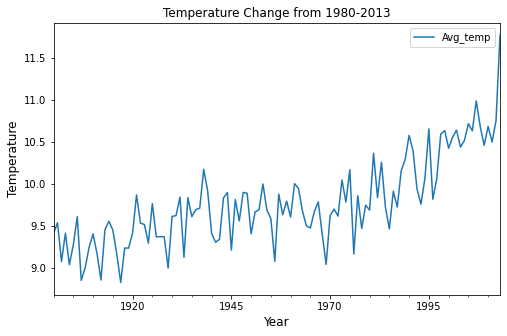

In [28]:
resample_df.plot(title='Temperature Change from 1980-2013',figsize=(8,5))
plt.ylabel('Temperature',fontsize=12)
plt.xlabel('Year',fontsize=12)
plt.legend()

# AUTO ARIMA

In [29]:
!pip install pmdarima

In [30]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

## we can not do direct split as data is continous

In [31]:
train, test = train_test_split(resample_df, train_size=int(0.7 * resample_df.shape[0]))

In [32]:
train.shape,test.shape

((79, 1), (35, 1))

In [33]:
# Fit your model
model = pm.auto_arima( train, start_p=7, max_p=10, seasonal=False, trace = True,random =True) #seasonal =False
# random search
# make your forecasts
forecasts = model.predict(test.shape[0])

Performing stepwise search to minimize aic
 ARIMA(7,1,2)(0,0,0)[0] intercept   : AIC=39.005, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=72.383, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=54.073, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=30.338, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=70.383, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=34.292, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=31.048, Time=0.11 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.192 seconds


In [34]:
train_size = int(0.7 * resample_df.shape[0])
test_size = resample_df.shape[0] - train_size

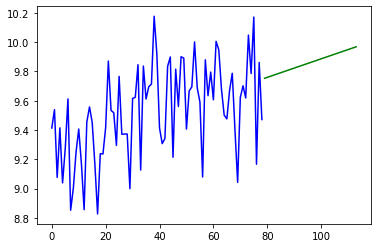

In [35]:
# Visualize the forecasts (blue=train, green=forecasts)
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(resample_df.shape[0])
plt.plot(x[:train_size], train, c='blue')
plt.plot(x[train_size:], forecasts, c='green')
plt.show()

In [36]:
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [37]:
model = ARIMA(train, order=(0,1,1)) # order is p,d,q #5,0,0
model_fit = model.fit()
output = model_fit.forecast(test_size)
output

1979-12-31    9.659417
1980-12-31    9.659417
1981-12-31    9.659417
1982-12-31    9.659417
1983-12-31    9.659417
1984-12-31    9.659417
1985-12-31    9.659417
1986-12-31    9.659417
1987-12-31    9.659417
1988-12-31    9.659417
1989-12-31    9.659417
1990-12-31    9.659417
1991-12-31    9.659417
1992-12-31    9.659417
1993-12-31    9.659417
1994-12-31    9.659417
1995-12-31    9.659417
1996-12-31    9.659417
1997-12-31    9.659417
1998-12-31    9.659417
1999-12-31    9.659417
2000-12-31    9.659417
2001-12-31    9.659417
2002-12-31    9.659417
2003-12-31    9.659417
2004-12-31    9.659417
2005-12-31    9.659417
2006-12-31    9.659417
2007-12-31    9.659417
2008-12-31    9.659417
2009-12-31    9.659417
2010-12-31    9.659417
2011-12-31    9.659417
2012-12-31    9.659417
2013-12-31    9.659417
Freq: A-DEC, Name: predicted_mean, dtype: float64

In [38]:
output[0]

9.659417307118154

In [39]:
mean_squared_error(test,output)**0.5# 0,1,0

0.810394017624847

# COUNTINUE

In [21]:
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Test Result: ')
test_df=adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output=pd.Series(test_df[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in test_df[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey Fuller Test Result: 
Test Statistic                 -0.728209
p-value                         0.839307
Lags Used                       2.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [22]:
decomp= seasonal_decompose(resample_df,freq=3)

trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

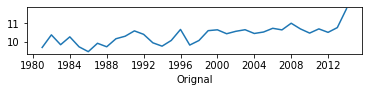

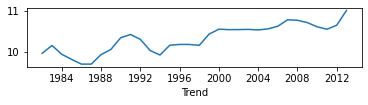

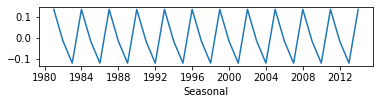

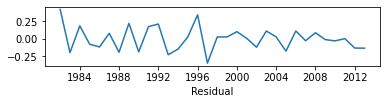

<Figure size 432x360 with 0 Axes>

In [23]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Orignal')
plt.figure(figsize=(6,5))

plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

plt.tight_layout()


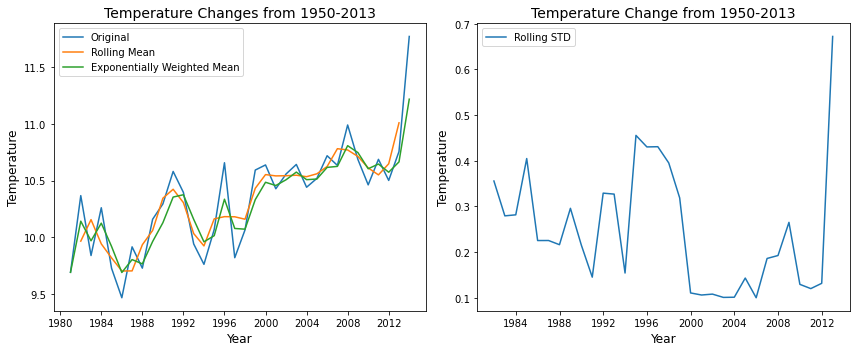

In [24]:
rol_mean = resample_df.rolling(window=3,center=True).mean()

ewm = resample_df.ewm(span=3).mean()

rol_std =resample_df.rolling(window=3,center=True).std()

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,5))

ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm,label='Exponentially Weighted Mean')

ax1.set_title('Temperature Changes from 1950-2013', fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()


ax2.plot(rol_std,label='Rolling STD')
ax2.set_title('Temperature Change from 1950-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [41]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)
print('Dickey-Fuller Test for the Rolling Mean:')
df_test=adfuller(rol_mean.iloc[:,0].values, autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)
print('')
df_test=adfuller(ewm.iloc[:,0].values, autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey-Fuller Test for the Rolling Mean:
Test Statistic                 -1.588274
p-value                         0.489481
Lags Used                       1.000000
Number of Observations Used    10.000000
Critical Value (1%)            -4.331573
Critical Value (5%)            -3.232950
Critical Value (10%)           -2.748700
dtype: float64

Test Statistic                -2.950336
p-value                        0.039800
Lags Used                      5.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [25]:
diff_rol_mean= resample_df - rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_temp
Date,
1981-12-31,0.401781
1982-12-31,-0.316726
1983-12-31,0.318708
1984-12-31,-0.091684
1985-12-31,-0.236199


In [26]:
diff_ewm = resample_df -ewm
diff_ewm.dropna(inplace = True)
diff_ewm.head()

,Avg_temp
Date,
1980-12-31,0.000000
1981-12-31,0.225574
1982-12-31,-0.129877
1983-12-31,0.136118
1984-12-31,-0.192797


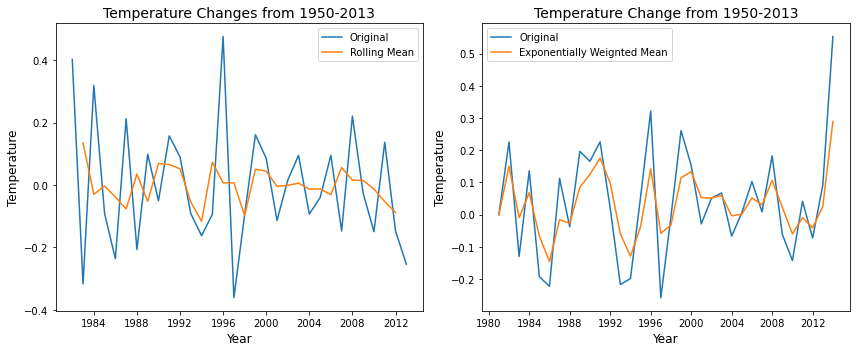

In [27]:
df_rol_mean_diff = diff_rol_mean.rolling(window=3,center=True).mean()

df_ewm_diff = diff_ewm.ewm(span=3).mean()

#rol_std =resample_df.rolling(window=3,center=True).std()

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (12,5))

ax1.plot(diff_rol_mean,label='Original')
ax1.plot(df_rol_mean_diff,label='Rolling Mean')
#ax1.plot(ewm,label='Exponentially Weighted Mean')

ax1.set_title('Temperature Changes from 1950-2013', fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('Year',fontsize=12)
ax1.legend()


ax2.plot(diff_ewm,label= 'Original')
ax2.plot(df_ewm_diff,label='Exponentially Weignted Mean')
ax2.set_title('Temperature Change from 1950-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('Year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()


In [28]:

print('Dickey-Fuller Test for the Rolling Mean:')
df_test=adfuller(diff_rol_mean.iloc[:,0].values, autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)
print('')
df_test=adfuller(diff_ewm.iloc[:,0].values, autolag='AIC')
df_output=pd.Series(df_test[0:4],index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in df_test[4].items():
    df_output['Critical Value (%s)'%key] = value
print(df_output)

Dickey-Fuller Test for the Rolling Mean:
Test Statistic                -7.007710e+00
p-value                        7.051586e-10
Lags Used                      1.000000e+00
Number of Observations Used    3.000000e+01
Critical Value (1%)           -3.669920e+00
Critical Value (5%)           -2.964071e+00
Critical Value (10%)          -2.621171e+00
dtype: float64

Test Statistic                 -4.297446
p-value                         0.000449
Lags Used                       1.000000
Number of Observations Used    32.000000
Critical Value (1%)            -3.653520
Critical Value (5%)            -2.957219
Critical Value (10%)           -2.617588
dtype: float64


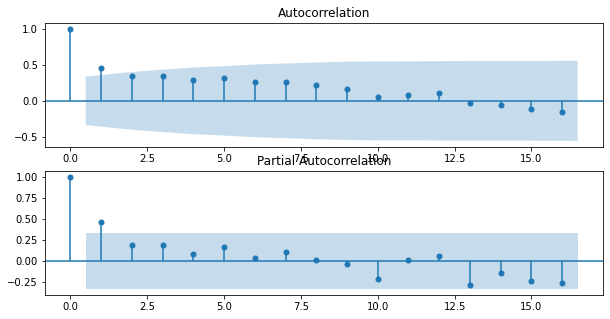

In [31]:
from statsmodels.graphics.tsaplots import  plot_acf
from statsmodels.graphics.tsaplots import  plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df,ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(resample_df,ax=pyplot.gca())
pyplot.show()